### Problem Statement:


The objective of this study is to develop a predictive model using an online shop's customer sales dataset. The model aims to estimate the 'Revenue_Total' by leveraging the following customer demographics and transactional information:

1.Customer_id = unique customer id
2.Age = customer's age
3.Gender = 0: Male, 1: Female
4.Revenue_Total = total sales by customer
5.N_Purchases = number of purchases to date
6.Purchase_DATE = date latest purchase, dd.mm.yy
7.Purchase_VALUE = latest purchase in €
8.Pay_Method = 0: Digital Wallets, 1: Card, 2: PayPal, 3: Other
9.Time_Spent = time spent (in sec) on website
10.Browser = 0: Chrome, 1: Safari, 2: Edge, 3: Other
11.Newsletter = 0: not subscribed, 1: subscribed
12.Voucher = 0: not used, 1: used

The goal is to utilize these features to create an accurate model that predicts the total revenue generated from customer purchases.


### Nature of Target Variable:
The 'Revenue_Total' is a continuous numerical variable representing the total revenue generated from each customers purchases. The goal is to predict this variable accurately to understand and optimize sales performance.

### Predicting 'Revenue_Total' helps businesses:
1. Understand customer spending patterns and optimize marketing strategies.
2. Identify high-value customers and tailor personalized offers.
3. Forecast future sales, maximize profitability, and enhance customer satisfaction.

### Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


### Loading the dataset

In [2]:
df = pd.read_csv(r"C:\Users\HP\Downloads\python learning\capstone.csv")

### Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is like the first step in understanding a story. It helps us dig deep into how the data is organized, find hidden patterns, and discover important trends. During EDA, we look closely at how each piece of information is spread out, check if things are connected, and find out the special connections between different parts.

We use visual tools a lot during EDA. These tools help us see the data clearly, understand how customers behave, and figure out what things might affect the 'Revenue_Total'.

In [8]:
# Display the first few rows of the dataset
df.head()


,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0


In [9]:
# Display the last few rows of the dataset
df.tail()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
65791,570099,30,1,10.9,4,15.02.21,6.213,1,894,0,0,0
65792,570100,33,0,29.3,1,05.02.21,29.300,0,722,0,0,0
65793,570101,50,0,25.4,5,29.10.21,23.114,3,424,0,0,0
65794,570102,56,0,29.2,1,09.12.21,29.200,3,731,0,0,0
65795,570103,25,0,5.3,2,23.10.21,2.968,0,820,0,0,0


### Checking Null Values and Duplicates in the Dataset

In [4]:
# Check for missing values
df.isnull().sum()



Customer_id       0
Age               0
Gender            0
Revenue_Total     0
N_Purchases       0
Purchase_DATE     0
Purchase_VALUE    0
Pay_Method        0
Time_Spent        0
Browser           0
Newsletter        0
Voucher           0
dtype: int64

In [3]:
# Check for duplicates in Customer_id
df.duplicated().sum()


0

In [10]:
# Getting more information about the columns
df.describe()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
count,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000
mean,537205.500000,39.592696,0.671348,27.732935,3.992477,15.968699,1.308651,598.925603,0.630935,0.151027,0.250258
std,18993.813493,13.825466,0.469727,14.941878,2.004370,13.229295,1.081959,277.833635,0.996407,0.358078,0.433165
min,504308.000000,16.000000,0.000000,0.500000,1.000000,0.005000,0.000000,120.000000,0.000000,0.000000,0.000000
25%,520756.750000,28.000000,0.000000,15.300000,2.000000,4.819750,0.000000,358.000000,0.000000,0.000000,0.000000
50%,537205.500000,40.000000,1.000000,30.100000,4.000000,12.640000,1.000000,598.000000,0.000000,0.000000,0.000000
75%,553654.250000,51.000000,1.000000,37.600000,6.000000,24.752000,2.000000,840.000000,1.000000,0.000000,1.000000
max,570103.000000,63.000000,1.000000,59.900000,7.000000,59.900000,3.000000,1080.000000,3.000000,1.000000,1.000000


In [11]:
# Checking the datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65796 entries, 0 to 65795
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     65796 non-null  int64  
 1   Age             65796 non-null  int64  
 2   Gender          65796 non-null  int64  
 3   Revenue_Total   65796 non-null  float64
 4   N_Purchases     65796 non-null  int64  
 5   Purchase_DATE   65796 non-null  object 
 6   Purchase_VALUE  65796 non-null  float64
 7   Pay_Method      65796 non-null  int64  
 8   Time_Spent      65796 non-null  int64  
 9   Browser         65796 non-null  int64  
 10  Newsletter      65796 non-null  int64  
 11  Voucher         65796 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 6.0+ MB


### Revenue Percentage by Age Group

In [6]:
print(df['Age'].dtype)
print(df['Age'].describe())

int64
count    65796.000000
mean        39.592696
std         13.825466
min         16.000000
25%         28.000000
50%         40.000000
75%         51.000000
max         63.000000
Name: Age, dtype: float64


#### The dataset comprises 65,796 unique customers, with their ages spanning from 16 to 63 years old.

The average age of these customers is 39.59 years, with the middle value (50th percentile or median) being 40 years.

The youngest customer in the dataset is 16 years old, while the oldest customer is 63 years old.

In [53]:
# Create age bins
age_bins = [15, 25, 35, 45, 65]
age_labels = ['16-25', '26-35', '36-45', '46-63']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Group the data by age group and calculate total revenue
age_revenue = df.groupby('Age_Group')['Revenue_Total'].sum().reset_index()

# Calculate the percentage of total revenue generated by each age group
age_revenue['Revenue_Percentage'] = age_revenue['Revenue_Total'] / age_revenue['Revenue_Total'].sum() * 100

# Print the results
print(age_revenue)

  Age_Group  Revenue_Total  Revenue_Percentage
0     16-25       375562.3           20.581957
1     26-35       376502.2           20.633466
2     36-45       383389.7           21.010922
3     46-63       689262.0           37.773655


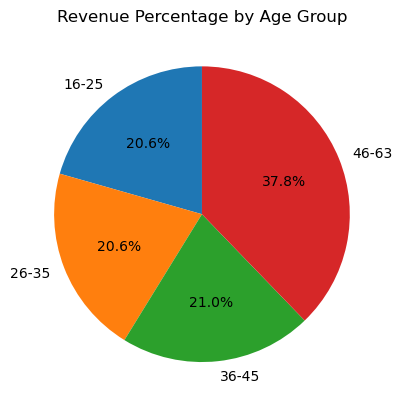

In [8]:
# Set up the figure and axis
fig, ax = plt.subplots()

# Create the pie chart
ax.pie(age_revenue['Revenue_Percentage'], labels=age_revenue['Age_Group'], autopct='%1.1f%%', startangle=90)

# Add a title
ax.set_title('Revenue Percentage by Age Group')

# Show the plot
plt.show()

#### Customers aged 46-63 contribute the highest revenue at 37.77%.
Revenue percentages for other age groups are similar: 16-25 (20.58%), 26-35 (20.63%), and 36-45 (21.01%).
Targeted marketing towards the 46-63 age group could capitalize on their higher revenue contribution.

### Distribution of Customers by Gender

In [9]:
gender_counts = df['Gender'].value_counts()
total_customers = gender_counts.sum()

male_percent = (gender_counts[0] / total_customers) * 100
female_percent = (gender_counts[1] / total_customers) * 100

print(f"Male percentage: {male_percent:.2f}%")
print(f"Female percentage: {female_percent:.2f}%")

Male percentage: 32.87%
Female percentage: 67.13%


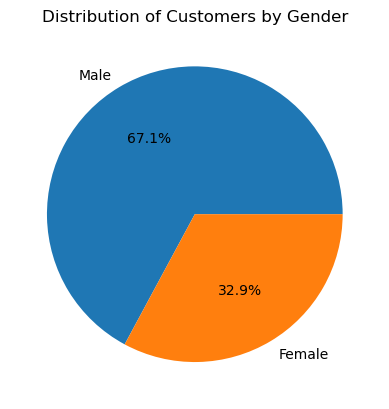

In [17]:
gender_counts = df['Gender'].value_counts()
labels = ['Male', 'Female']

plt.pie(gender_counts, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Customers by Gender')
plt.show()

#### Based on the pie chart of the gender distribution, we can see that around 67.1% of the customers in this dataset are female, while 32.9% are male.

### Total Revenue by Gender

In [10]:
gender_revenue = df.groupby('Gender')['Revenue_Total'].sum().reset_index()
gender_revenue['Revenue_Percentage'] = gender_revenue['Revenue_Total'] / gender_revenue['Revenue_Total'].sum() * 100
print(gender_revenue)

   Gender  Revenue_Total  Revenue_Percentage
0       0       600161.5           32.890676
1       1      1224554.7           67.109324


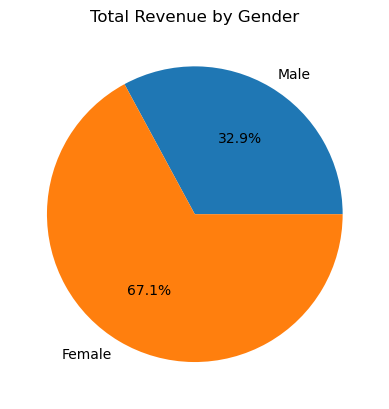

In [11]:
plt.pie(gender_revenue['Revenue_Total'], labels=['Male', 'Female'], autopct='%1.1f%%')
plt.title('Total Revenue by Gender')
plt.show()

#### Female customers contribute 67.11% of the total revenue, surpassing males (32.89%).
The higher revenue from females suggests a potentially larger female customer base.

### No of purchases

In [12]:
print(df['N_Purchases'].describe())

count    65796.000000
mean         3.992477
std          2.004370
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max          7.000000
Name: N_Purchases, dtype: float64


#### The average number of purchases per customer is approximately 4.
The low standard deviation implies consistency in purchase frequency among most customers.
The range of purchases spans from 1 to 7, with no customers making more than 7 purchases.
The median purchase count is 4, indicating an even split between customers making 4 or fewer purchases and those making more than 4.

### Total Revenue by Month

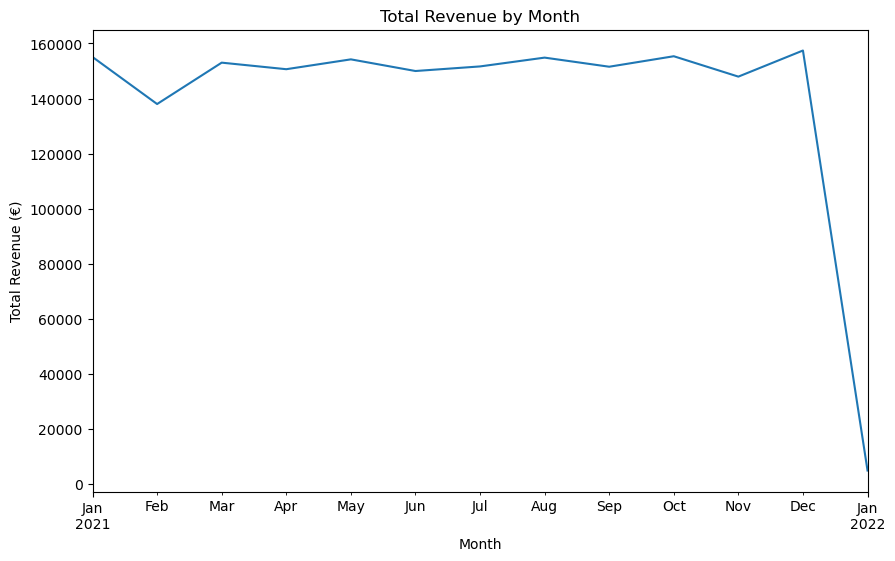

In [13]:
# Convert purchase date to datetime format
df['Purchase_DATE'] = pd.to_datetime(df['Purchase_DATE'], format='%d.%m.%y')

# Aggregate data by month and calculate total revenue
monthly_revenue = df.groupby(pd.Grouper(key='Purchase_DATE', freq='M'))['Revenue_Total'].sum()

# Plot monthly revenue
fig, ax = plt.subplots(figsize=(10, 6))
monthly_revenue.plot(kind='line', ax=ax)
ax.set_xlabel('Month')
ax.set_ylabel('Total Revenue (€)')
ax.set_title('Total Revenue by Month')
plt.show()

In [14]:
monthly_revenue

Purchase_DATE
2021-01-31    155080.9
2021-02-28    138002.9
2021-03-31    153033.8
2021-04-30    150651.5
2021-05-31    154229.4
2021-06-30    149994.9
2021-07-31    151661.3
2021-08-31    154860.3
2021-09-30    151553.3
2021-10-31    155362.4
2021-11-30    147957.0
2021-12-31    157438.0
2022-01-31      4890.5
Freq: M, Name: Revenue_Total, dtype: float64

#### The peak monthly revenue occurred in December 2021, reaching 157438.0 units, while the lowest was in January 2022 at 4890.5 units.
Revenue shows fluctuations throughout the year but maintains a degree of overall stability.

In [15]:
monthly_revenue.median()

151661.3

### Purchase_VALUE

In [17]:
print(df['Purchase_VALUE'].dtype)
print(df['Purchase_VALUE'].describe())

float64
count    65796.000000
mean        15.968699
std         13.229295
min          0.005000
25%          4.819750
50%         12.640000
75%         24.752000
max         59.900000
Name: Purchase_VALUE, dtype: float64


#### The minimum purchase value is 0.005 and the maximum purchase value is 59.90

### Payment Method Distribution

In [19]:
print(df['Pay_Method'].dtype)

int64


In [20]:
df['Pay_Method'].unique()

array([1, 2, 0, 3], dtype=int64)

### Payment Method
0: Digital Wallets
1: Card
2: PayPal
3: Other

In [26]:
# Count the number of each payment method
payment_counts = df['Pay_Method'].value_counts()

# Convert the counts to percentages
payment_percents = payment_counts / len(df) * 100

In [27]:
payment_percents

1    30.023102
0    28.991124
2    22.115326
3    18.870448
Name: Pay_Method, dtype: float64

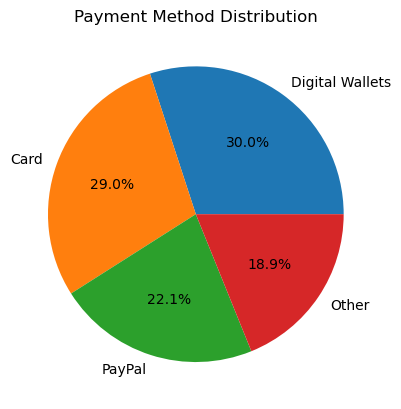

In [30]:
# count the number of occurrences of each payment method
counts = df['Pay_Method'].value_counts()

# create a pie chart with labels for each payment method
labels = ['Digital Wallets', 'Card', 'PayPal', 'Other']
plt.pie(counts, labels=labels, autopct='%1.1f%%')

# add a title
plt.title('Payment Method Distribution')

# display the chart
plt.show()

#### The primary payment method utilized is cards, representing 30.02% of total purchases.
#### Digital wallets rank as the second most popular choice, comprising 28.99% of purchases.
#### PayPal stands as the third most common payment method, accounting for 22.12% of purchases.
#### Other payment methods, such as cash, bank transfers, or alternative options, contribute 18.87% to total purchases.

In [34]:
print(df['Time_Spent'].describe())

count    65796.000000
mean       598.925603
std        277.833635
min        120.000000
25%        358.000000
50%        598.000000
75%        840.000000
max       1080.000000
Name: Time_Spent, dtype: float64


###### Time_Spent = time spent (in sec) on website

#### The average time spent is approximately 599 seconds (or around 10 minutes) per purchase.
The minimum time spent is 120 seconds (or 2 minutes) per purchase.
The maximum time spent is 1080 seconds (or 18 minutes) per purchase.

### most commonly used browser

## Browser

0: Chrome
1: Safari
2: Edge
3: Other

In [35]:
browser_count = df['Browser'].value_counts()
print(browser_count)

0    42076
1    13135
3     7208
2     3377
Name: Browser, dtype: int64


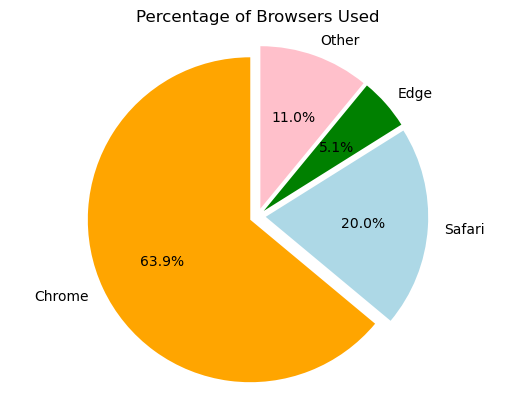

In [36]:
# Count the number of occurrences of each browser
browser_counts = df['Browser'].value_counts()

# Create a pie chart
labels = ['Chrome', 'Safari', 'Edge', 'Other']
sizes = [browser_counts.get(0, 0), browser_counts.get(1, 0), browser_counts.get(2, 0), browser_counts.get(3, 0)]
colors = ['orange', 'lightblue', 'green', 'pink']
explode = (0.05, 0.05, 0.05, 0.05)

plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)
plt.axis('equal')

# Add a title
plt.title('Percentage of Browsers Used')

# Show the chart
plt.show()

In [37]:
browser_counts

0    42076
1    13135
3     7208
2     3377
Name: Browser, dtype: int64

#### Chrome is the most commonly used browser, followed by Safari, Other and Edge.

It appears that Chrome is significantly more popular than the other browsers, as it has over three times as many users as Safari, and over twelve times as many users as Edge.

### Percentage of Newsletter Subscribers

### Newsletter

0: not subscribed
1: subscribed

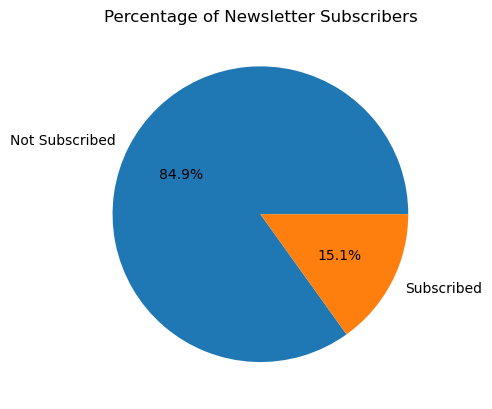

In [38]:
newsletter_counts = df['Newsletter'].value_counts()
newsletter_percents = newsletter_counts / newsletter_counts.sum() * 100

labels = ['Not Subscribed', 'Subscribed']
plt.pie(newsletter_percents, labels=labels, autopct='%1.1f%%')
plt.title('Percentage of Newsletter Subscribers')
plt.show()

In [39]:
newsletter_percents

0    84.897258
1    15.102742
Name: Newsletter, dtype: float64

#### 84.9% of the customers have not subscribed to the newsletter, while only 15.1% have subscribed.

### Percentage of Customers who have Used Vouchers
0: not used
1: used

In [40]:
# Get the voucher counts
voucher_counts = df['Voucher'].value_counts()
voucher_counts

0    49330
1    16466
Name: Voucher, dtype: int64

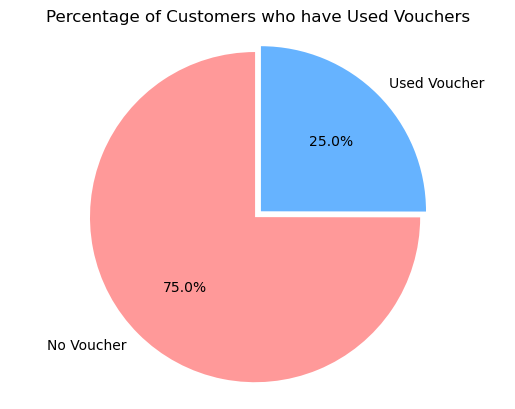

In [41]:
voucher_percents = voucher_counts / voucher_counts.sum() * 100
labels = ['No Voucher', 'Used Voucher']
colors = ['#ff9999','#66b3ff']
explode = (0.05, 0)

plt.pie(voucher_percents, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Percentage of Customers who have Used Vouchers')
plt.show()

#### we can see that there are 75% customers who have not used any voucher, and 25% customers who have used at least one voucher.

### Newsletter subscription does have any significant impact on voucher usage?

In [45]:
voucher_pivot = pd.pivot_table(df, values='Voucher', index='Newsletter', aggfunc=np.mean)
voucher_pivot

,Voucher
Newsletter,
0,0.249485
1,0.254604


#### The percentage of customers utilizing vouchers remains nearly identical for both groups. Specifically, 24.94% of customers who did not subscribe to the newsletter used vouchers, compared to 25.46% of customers who subscribed to the newsletter.

Hence, we can infer that subscribing to the newsletter does not exert a substantial influence on the utilization of vouchers.

### Analyzing the impact of the browser on newsletter subscription

<Axes: xlabel='Newsletter', ylabel='Browser'>

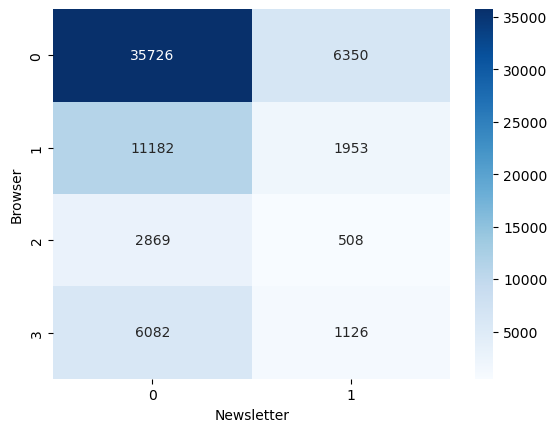

In [46]:
browser_newsletter_pivot = pd.pivot_table(df, values='Customer_id', index='Browser', columns='Newsletter', aggfunc=lambda x: len(x.unique()))
sns.heatmap(browser_newsletter_pivot, annot=True, fmt='g', cmap='Blues')

In [47]:
browser_newsletter_pivot

Newsletter,0,1
Browser,,
0,35726,6350
1,11182,1953
2,2869,508
3,6082,1126


#### Most subscribers and non-subscribers use Chrome as their browser.
Safari is the second most popular browser for both groups.
However, there are differences in subscriber-to-non-subscriber ratios across browsers.
Safari users have a relatively higher proportion of subscribers, while Edge and Other browser users have a higher proportion of non-subscribers.
This implies that the influence of newsletters on voucher usage may vary based on the browser type.

### Payment Method by Age Group

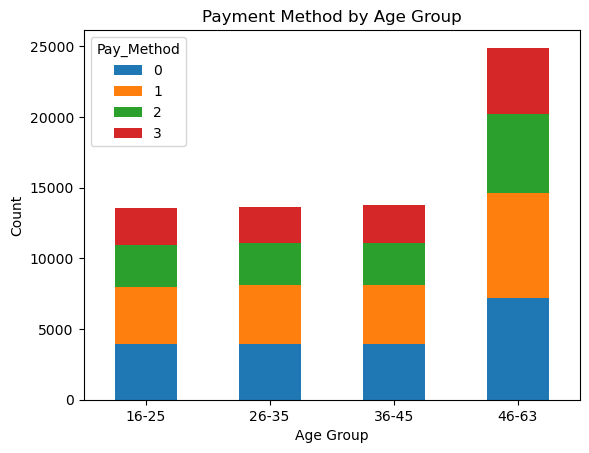

In [54]:
# group the data by age group and payment method
age_pay = df.groupby(['Age_Group', 'Pay_Method'])['Customer_id'].count().unstack()

# plot the stacked bar chart
age_pay.plot(kind='bar', stacked=True)

# add labels and title
plt.title('Payment Method by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)

# show the plot
plt.show()


In [55]:
age_pay

Pay_Method,0,1,2,3
Age_Group,,,,
16-25,3957,4020,2985,2577
26-35,3957,4137,2977,2561
36-45,3956,4176,2981,2625
46-63,7205,7421,5608,4653


#### Across all age groups, the preferred payment method is method 1 (card), trailed by method 2 (PayPal), method 0 (digital wallets), and method 3 (other). Notably, payments using method 0 remain relatively stable across all age demographics.

Yet, the age group of 46-63 exhibits the highest usage of method 1 (card) and method 2 (PayPal) compared to other age brackets.

### Key insights from this dataset:

#### Most customers are between 26-35 years old, followed by those aged 36-45.
Digital wallets and cards are the top payment choices, while PayPal and other methods are less popular.
On average, customers spend about 598 seconds (roughly 10 minutes) on the website, with some variability.
Safari users spend the most time on the website, while users of other browsers spend the least time.
More than 84% of customers are subscribed to the newsletter.
Subscribing to the newsletter doesn't significantly affect revenue.
Time spent on the website doesn't clearly impact how much customers spend.
The time customers spend on the website is mostly evenly spread out.
Customers of all ages mainly use digital wallets and cards, although the specific percentages vary.
Over time, there's a small increase in the time customers spend on the website.





